In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [12]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [13]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [24]:
# Find the most recent date in the data set.
recent = session.query(Measurement.date).order_by((Measurement.date).desc()).first()
print(recent)

('2017-08-23',)


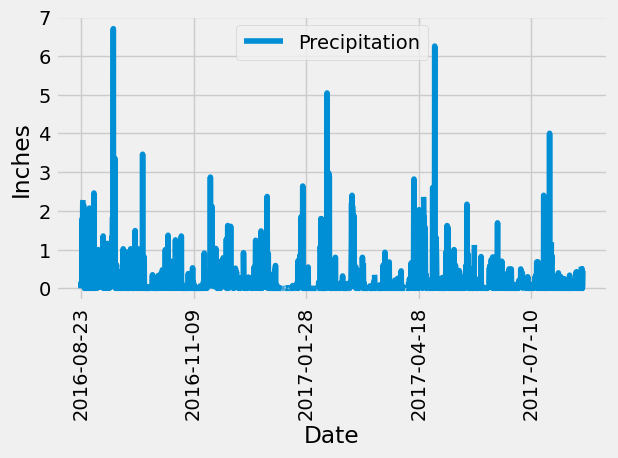

In [74]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
enddate = dt.datetime.strptime(recent[0], "%Y-%m-%d")
startdate = enddate - dt.timedelta(days=366)

# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date,
       Measurement.prcp]

prcpdata = session.query(*sel).filter(Measurement.date > startdate).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcpdf = pd.DataFrame(prcpdata, columns = ['Date', 'Precipitation'])
prcpdf = prcpdf.set_index('Date')

# Use Pandas Plotting with Matplotlib to plot the data
prcpdf.plot()
plt.xticks(rotation = 90)
plt.yticks(np.arange(8))
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.show()



In [75]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcpdf.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [76]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [87]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by((func.count(Measurement.station)).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [122]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
MostActive = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by((func.count(Measurement.station)).desc()).first()

print(MostActive[0])

sel = [func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
temp = session.query(*sel).filter(Measurement.station == MostActive[0]).all()

print(temp)



USC00519281
[(54.0, 85.0, 71.66378066378067)]


2016-08-17 00:00:00


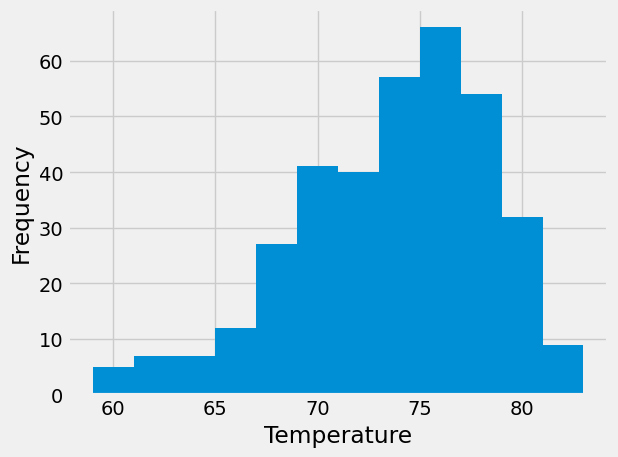

In [143]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Calculate the date one year from the last date in data set.

recent1 = session.query(Measurement.date).filter(Measurement.station  == MostActive[0]).order_by((Measurement.date).desc()).first()

enddate1 = dt.datetime.strptime(recent1[0], "%Y-%m-%d")
startdate1 = enddate1 - dt.timedelta(days=366)
print(startdate1)

# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date,
       Measurement.tobs]

tempdata = session.query(*sel).filter(Measurement.date > startdate1).filter(Measurement.station == MostActive[0]).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
tempdata = pd.DataFrame(tempdata)['tobs']

# Use Pandas Plotting with Matplotlib to plot the data
tempdata.plot.hist(bins =12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()




# Close Session

In [141]:
# Close Session
session.close()